66
70


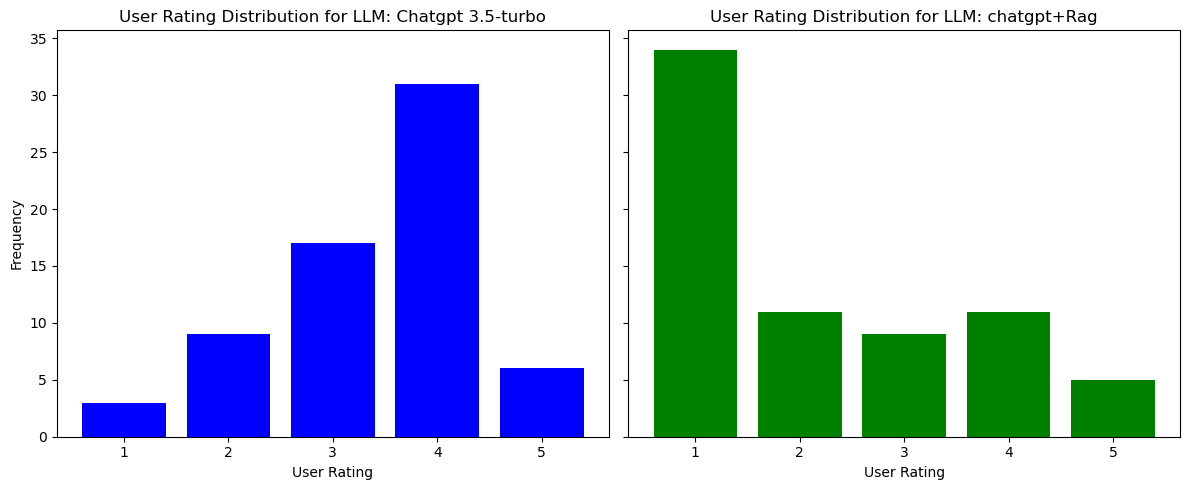

In [1]:
import matplotlib.pyplot as plt
import json

# Provided data, simplified to avoid processing issues
with open("evaluations_data.json", "r") as file:
    data = json.load(file)

# Split data by LLM
ratings_llm_1 = [x['user_rating'] for x in data if x['LLM'] == 1]
ratings_llm_2 = [x['user_rating'] for x in data if x['LLM'] == 2]
print(len(ratings_llm_1))
print(len(ratings_llm_2))
# Create histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax[0].hist(ratings_llm_1, bins=range(1, 7), align='left', color='blue', rwidth=0.8)
ax[0].set_title('User Rating Distribution for LLM: Chatgpt 3.5-turbo')
ax[0].set_xlabel('User Rating')
ax[0].set_ylabel('Frequency')
ax[0].set_xticks(range(1, 6))

ax[1].hist(ratings_llm_2, bins=range(1, 7), align='left', color='green', rwidth=0.8)
ax[1].set_title('User Rating Distribution for LLM: chatgpt+Rag')
ax[1].set_xlabel('User Rating')

plt.tight_layout()
plt.show()


In [5]:
#Only the RAG
evals_llm_2 = [x for x in data if x['LLM']==2]

# Find the questions to take out: "I don't know"
questions_to_take_out = []
for evalu in evals_llm_2:
    if evalu['LLM_answer'] == "I don't know.":
        questions_to_take_out.append(evalu['user_question_raw'])
        
#What have we taken out?
print(len(questions_to_take_out))
for question in questions_to_take_out:
    print(question)

36
How does saccharine latissima taste like?
How does the chemical composition of saccharine latissima change with regions?
What are the optimal light and temperature conditions for the growth of Saccharina Latissima
What is the iodine content of sacchaina latissima
How many companies are there in Europe that produce microalgae and macroalgae?
How much CO2 equivalent emissions should you account for in the production of 1 ton of Saccharina latissima, from cradle to farm gate, using a life cycle perspective?
Where can I find edible algae at the coast of Sweden?
What is the optimal growth depth of Furcellaria?
what are the best way to get rid of contamination in a nannochloropsis culture?
How much carbon is contained in 1 ton of fresh weight saccharina latissima?
Which country has regulations about algaes?
what are the limitations of brown algae for food use
What is the biomass amount of Furcellaria in the Baltic Sea?
What are the typical life cycle impact hotspots from farming seaweed?


In [8]:
#Now take these questions out of the dataset:
no_i_dont_know_questions = [x for x in data if x['user_question_raw'] not in questions_to_take_out]
print(len(no_i_dont_know_questions))

#What is stil in:
for question in no_i_dont_know_questions:
    print(question['user_question_raw'])

68
Theus stands for
Theus stands for
Is there cellulose in the chlorella cell?
what are the main growth areas of red algae
Is there cellulose in the chlorella cell?
what happens to the pigments during blanching of saccharina latissima
Hi algaebrain
Seaweed and algae are being touted as climate solutions. What evidence is there in the scientific literature about this and what are the most recent discussion trends on this issue?
What is the average protein content in chlorella?
Can we extract fucoidan and alginate with high yields at the same time from brown algae?
What is the average protein content in chlorella?
Can fucoxanthin be extracted economically from brown algae
what are the main growth areas of red algae
which algae species has the highest concentration of fucoidan?
Which algae are best to cultivate in the baltic sea?
What is the maximum annual biomass production of algae per hectare?
Wah is the salinity limits for Ulva?
how can you grow algae in cold regions
which species of 

34
34


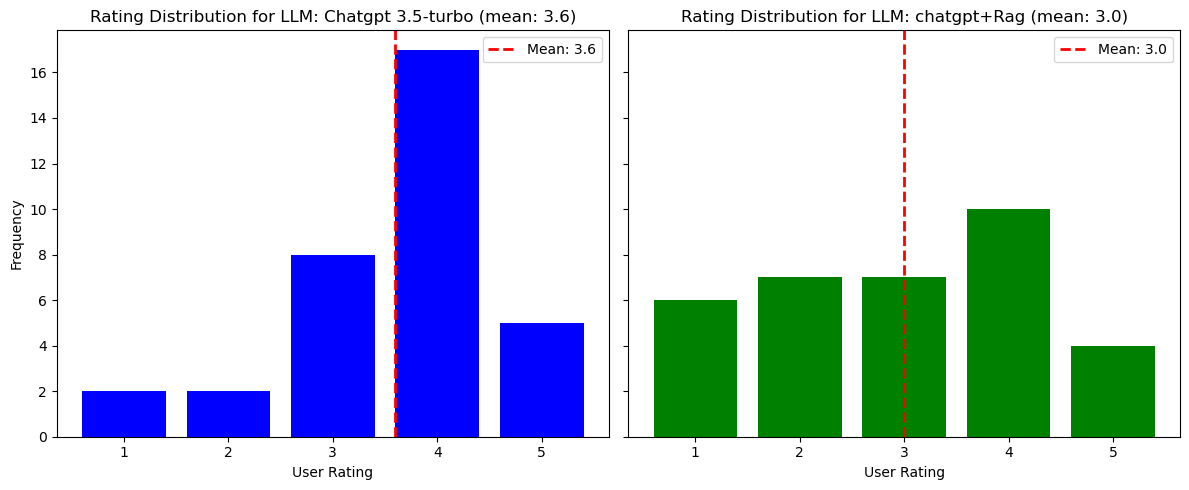

In [9]:
from statistics import mean 
#Lets make a new visualisation of cleaned data
# Split data by LLM
ratings_llm_1 = [x['user_rating'] for x in no_i_dont_know_questions if x['LLM'] == 1]
ratings_llm_2 = [x['user_rating'] for x in no_i_dont_know_questions if x['LLM'] == 2]
print(len(ratings_llm_1))
print(len(ratings_llm_2))
mean1 = round(mean(ratings_llm_1),1)
mean2 = round(mean(ratings_llm_2),1)

# Create histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax[0].hist(ratings_llm_1, bins=range(1, 7), align='left', color='blue', rwidth=0.8)
ax[0].set_title(f'Rating Distribution for LLM: Chatgpt 3.5-turbo (mean: {mean1})')
ax[0].set_xlabel('User Rating')
ax[0].set_ylabel('Frequency')
ax[0].set_xticks(range(1, 6))
ax[0].axvline(mean1, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean1}')
ax[0].legend()

ax[1].hist(ratings_llm_2, bins=range(1, 7), align='left', color='green', rwidth=0.8)
ax[1].set_title(f'Rating Distribution for LLM: chatgpt+Rag (mean: {mean2})')
ax[1].set_xlabel('User Rating')
ax[1].axvline(mean2, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean2}')
ax[1].legend()

plt.tight_layout()
plt.show()

In [11]:
#To analyse more deeply why RAG questions are getting bad evaluations, we look more closely at questions
# that recieved 1 and 2.
bad_scores = [x for x in no_i_dont_know_questions if x['LLM'] == 2 and x['user_rating'] in [0,1,2]]
print(len(bad_scores))

questions = []
for evalu in bad_scores:
    questions.append(evalu['user_question_raw'])
len(questions)
    

13


13

In [14]:
#dataset with both Chatgpt-answers and Rag answers where the raganswers got poor ratings.
evals_bad = [x for x in data if x['user_question_raw'] in questions]
len(evals_bad)

24

In [16]:
the_list = sorted(evals_bad, key=lambda x: x['user_question_raw'], reverse=False)

for item in the_list:
    print('chatGpt3.5') if item['LLM'] == 1 else print('RAG')
    print(item['user_question_raw'])
    print(item['LLM_answer'])
    print(item['user_rating'])

chatGpt3.5
Can you explain how to apply a health claim approval for algae-based food supplements in E
U?
In the EU, health claims on food products, including algae-based supplements, are regulated by the European Food Safety Authority (EFSA) and the European Commission. The process of applying for a health claim approval for algae-based food supplements in the EU involves several steps:

1. **Scientific Substantiation**: The first step is to gather scientific evidence supporting the health claim you wish to make for your algae-based supplement. This evidence should be based on human intervention studies, observational studies, or mechanistic studies demonstrating a cause-and-effect relationship between the consumption of the algae supplement and the claimed health benefit.

2. **Health Claim Proposal**: Prepare a detailed health claim proposal that includes the specific wording of the claim, the target population, the conditions of use, and the proposed mechanism by which the algae-bas